<a href="https://colab.research.google.com/github/rachelvlassis/Data-Analytics-Portfolio/blob/main/FinalReport_CS260_Rachel_Vlassis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


---
#### CS 260 Final Project - SP23
---

# An Evaluation of Hotel Reservation Data and Its Utilization in Marketing

### By: Rachel Vlassis, Hannah Postlethwait, and Jaevien Bennett


---

## 1. Introduction

For this project, our group explored data pertaining to a hotel based in Lisbon, Portugal for the timeframe consisting of July 1st 2015 to August 31st 2017. The dataset consists of 79,329 unique ID numbers to detail each booking the hotel made during the designated timeframe.

We made the decision to look at this data through the lens of a marketer and use visaulizations to aid us in understanding the operations of the hotel. In doing this, we have been able to draw conclusions on current operations and make suggsestions for future ones.

Below you will find a detailed summary of the dataset and its variables, followed by graphs of ones we found particularly important and how they allowed us to better understand the hotel's marketing as a whole.

---

## 2. Data

A direct link to the data can be found at the following website.
 *  https://www.sciencedirect.com/science/article/pii/S2352340918315191


 According to the journal, the data was extracted from the hotel's property management systems SQL databases.



In [ ]:

try:

    csv_data = pd.read_csv("https://github.com/rachelvlassis/CS-260-Hotel-Reservations-2015-17/blob/main/CS%20260%20Hotel%20Reservation%20Final%20Project%20.csv?raw=true")
    csv_data_temps = pd.read_csv("https://raw.githubusercontent.com/rachelvlassis/CS-260-Hotel-Reservations-2015-17/main/portugal%202015-07-01%20to%202017-08-31.csv")


    conn = sql.connect('hotel_res')



    csv_data.to_sql('hotel_res', conn, index = False)
    csv_data_temps.to_sql('temps', conn, index = False)

except ValueError:
    print("""A ValueError occurred. If you've run this cell twice,
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.""")

A ValueError occurred. If you've run this cell twice, 
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.


In [ ]:
#Show the rows of the table.
sql_statement = """SELECT *
                   FROM hotel_res"""

results = pd.read_sql_query(sql_statement, conn)
results

,id,is_cancel,num_lead_time,arriv_yr,arriv_month,arriv_wk,arriv_day,num_wknd,num_wkday,num_adults,...,deposit_type,agent_id,company_id,num_day_waiting,cust_type,avg_daily_rate,num_park_spaces,num_spec_reqs,res_status,res_status_date
0,1,0,6,2015,July,27,1,0,2,1,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,7/3/2015
1,2,1,88,2015,July,27,1,0,4,2,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,7/1/2015
2,3,1,65,2015,July,27,1,0,4,1,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,4/30/2015
3,4,1,92,2015,July,27,1,2,4,2,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,6/23/2015
4,5,1,100,2015,July,27,2,0,2,2,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,4/2/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,79326,0,23,2017,August,35,30,2,5,2,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,9/6/2017
79326,79327,0,102,2017,August,35,31,2,5,3,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,9/7/2017
79327,79328,0,34,2017,August,35,31,2,5,2,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,9/7/2017
79328,79329,0,109,2017,August,35,31,2,5,2,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,9/7/2017


### 2.1 Summary of Variables within the hotel_res Table

The hotel_res table has 32 columns/variables and 79330 rows.  All variables are explained in this section.

Note that the table was read in from a csv, but had we created a formal SQLite database for the table, the schema would have been as follows.

```
CREATE TABLE "hotel_reserv" (
	"id"	INTEGER,
	"is_cancel"	TEXT,
	"num_lead_time"	INTEGER,
	"arriv_yr"	INTEGER,
	"arriv_month"	TEXT,
	"arriv_wk"	INTEGER,
	"arriv_day"	INTEGER,
	"num_wknd"	INTEGER,
	"num_wkday"	INTEGER,
	"num_adults"	INTEGER,
	"num_children"	INTEGER,
	"num_babies"	INTEGER,
	"meal"	TEXT,
	"country"	TEXT,
	"market_seg"	TEXT,
	"dist_channel"	TEXT,
	"repeat_guest"	TEXT,
	"num_prev_cancel"	INTEGER,
	"num_prev_not_cancel"	INTEGER,
	"res_room"	TEXT,
	"assign_room"	TEXT,
	"num_changes"	INTEGER,
	"deposit_type"	TEXT,
	"agent_id"	TEXT,
	"company_id"	TEXT,
	"num_day_waiting"	INTEGER,
	"cust_type"	TEXT,
	"avg_daily_rate"	REAL COLLATE BINARY,
	"num_park_spaces"	INTEGER,
	"num_spec_reqs"	INTEGER,
	"res_status"	TEXT,
	"res_staus_date"	INTEGER,
	PRIMARY KEY("id")
);
```

Below are the variables, their descriptions, their units, their types, and some descriptive statistics.





* **is_cancel** –  value indicating if the booking was canceled
  * Number of missing values: 0
  * Contains 2 distinct values:
    * (0) indicating that the booking was canceled or (1) that it was not
* **arriv_month** – month of arrival
  * Number of missing values: 0
  * Contains 12 distinct values:
    * The months of the year from January through December
* **arriv_year** – year of arrival, 2015-2017
  * Number of missing values: 0
  * Contains 3 distinct values:
    * 2015, 2016, and 2017
* **num_adults** – number of adults registered to the booking
  * Number of missing values: 0
  * Contains 5 distinct values:
    * 0,1,2,3,4
  * max value: 4, min value: 0, average value: 1.9
* **num_children** – number of children registered to the booking
  * Number of missing values: 4
  * Contains 4 distinct values
    * 1,2,3, Null
  * max value: 3, min value: 0, average value: 0.1
* **num_babies** – number of babies registered to the booking
  * Number of missing values: 0
  * Contains 5 distinct values
    * 0,1,2,9,10
  * max value: 10, min value: 0, average value: 0.0
* **meal** - Type of meal booked
  * Number of missing values: 0
  * Contains 4 distinct values
    * HB= half board, BB=bed and breakfast, SC=no meal package, FB=full board
* **country**- country of origin presented
  * Number of missing values: 24
  * Contains 166 distinct values:
    * Ex: RUS- Russia, ITA- Italy, and USA- United States of America
* **market_seg**- market segmentation designation
   * Number of missing values: 0
   * Contains 8 distinct values:
     * Offline TA/TO, Online TA, Groups, Complementary, Direct, Corporate, Undefined, and Aviation. TA= travel agent, TO= tour operators (all different market segmentations)
* **dist_channel**- booking distribution channel
  * Number of missing values: 0
  * Contains 5 distinct values:
    * TA/TO(TA=Travel Agent, TO=tour operators), Direct, Undefined, Corporate, and GDS (Global Distribution system)
* **repeat_guest**- value indicating if the booking customer was a repeat customer
  * Number of missing values: 0
  * Contains 2 distinct values:
    * 0 (meaning the booking customer isn’t a repeat customer) and 1 (meaning the booking customer is a repeat customer).
* **res_room**- code of room type reserved
  * Number of missing values: 0
  * Contains 9 distinct values:
    * A, B, F, D, G, E, K, C, and P. (letter code for reserved room)
* **Assign_room**- Code of the room the guest actually gets
   * Number of missing values: 0
   * Contains 8 distinct values:
     * A, B, F, D, E, K, C, and P. (letter code for officially given rooms)
* **Deposit_type** – indication if customer made a deposit
    * Number of missing values:0
    * Contains 3 distinct values:
        * No deposit
        *Non refund
        *Refundable
* **agent_id** – The id of the agent that made the booking
    * Number of missing values:0
    * Contains many distinct values some are:
        * 1
        *6
        *8
        *13
* **company_id** – ID of the company/entity that made the booking or responsible for paying the booking
    * Number of missing values: 0
    * Contains many distinct values some are:
        * 40
        *45
        *38
        *9
* **cust_type** – the different type of booking options
    * Number of missing values: 0
    * Contains 4 distinct values:
        * Transient-when the booking is not a part of a group or contract and is not associated to other transient booking
        *Transient party-when the booking is transient and it associate with at least one other transient booking
        *Contract- when the booking has an allotment or other type of contract associated to it
        *Group-when the booking is associated to a group
* **res_status** – reservation status
    * Number of missing values: 0
    * Contains 3 distinct values:
        * Canceled
        * No show
        *Check Out
* **res_status_date** – Date at which the last update was made
    * Number of missing values: 0
    * Contains many distinct values some are:
        * 7/3/2015
        *7/5/2015
        *6/23/2015
        *9/3/2015





* **num_lead_time** – number of days that elapsed between the entering date of the booking into the PMS and the arrival date
  * Number of missing values: 0
  * Max value: 629
  * min value: 0
  * Average value: 109.7
* **arriv_wk** – week of the year of arrival, 1-52
  * Number of missing values: 0
  * max value: 53
  * Min value: 1
  * Average value: 27.2
* **arriv_day** – numerical day of the month of arrival, 1-31
  * Number of missing values: 0
  * Max value: 31
  * Min value: 1
  * Average value: 15.8
* **num_wknd** – number of weekend nights, saturday or sunday, the guest stayed
  * Number of missing values: 0
  * Max value: 16
  * Min value: 0
  * Average value: 0.8
* **num_wkday** – number of weekdays, monday through friday, the guest stayed
  * Number of missing values: 0
  * Max value: 41
  * Min value: 0
  * Average value: 2.2
* **num_prev_cancel**- number of previous bookings that were canceled by the customer prior to the current booking
  * Number of missing values: 0
  * max value: 21
  * min value: 0
  * average value: 0.079743
* **num_prev_not_cancel** - number of previous bookings not canceled by the customer prior to current booking
  * Number of missing values: 0
  * Max value: 72
  * Min value: 0
  * Average value: 0.1323371
* **num_changes**- Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
  * Number of missing values: 0
  * Max value: 21
  * Min value: 0
  * Average value: 0.187369
* **num_day_waiting** – Number of days the booking was in the waiting list before it was confirmed to the customer
    * Number of missing values: 0
    * max value: 391
    * min value: 0
    * average value: 3.226774
* **Avg_daily_rate** – average daily rate
    * Number of missing values: 0
    * max value: 5400
    * min value: 0
    * average value: 105.304465
* **Num_park_spaces** – number of parking spaces required by customers
    * Number of missing values: 0
    * max value: 3
    * min value: 0
    * average value: 0.024367
* **num_spec_reqs** – Number of special requests by customer
    * Number of missing values: 0
    * max value: 5
    * min value: 0
    * average value: 0.546918





### 2.2 Code used to Summarize Variables

In this section we include the code used to describe the variables in the previous section.



In [ ]:
# the missing values for columns "is_cancel" through "num_babies" which have been renamed accordingly
sql_statement = """ SELECT COUNT(*) - COUNT(is_cancel) AS missing_cancel,
                          COUNT(*) - COUNT(num_lead_time) AS missing_lead_time,
                          COUNT (*) - COUNT(arriv_yr) AS missing_arriv_yr,
                          COUNT(*) - COUNT(arriv_month) AS missing_arriv_month,
                          COUNT(*) - COUNT(arriv_wk) AS mising_arriv_wk,
                          COUNT(*) - COUNT(arriv_day) AS missing_arriv_day,
                          COUNT (*) - COUNT(num_wknd) AS missing_num_wknd,
                          COUNT(*) - COUNT(num_wkday) AS missing_num_wkday,
                          COUNT(*) - COUNT(num_adults) AS mising_num_adults,
                          COUNT(*) - COUNT(num_children) AS mising_num_children,
                          COUNT(*) - COUNT(num_babies) AS missing_num_babies
                   FROM hotel_res """


results = pd.read_sql_query(sql_statement, conn)
results

,missing_cancel,missing_lead_time,missing_arriv_yr,missing_arriv_month,mising_arriv_wk,missing_arriv_day,missing_num_wknd,missing_num_wkday,mising_num_adults,mising_num_children,missing_num_babies
0,0,0,0,0,0,0,0,0,0,4,0


In [ ]:
# The distinct values for is_cancel column
sql_statement = """ SELECT DISTINCT(is_cancel)
                    FROM hotel_res """


results = pd.read_sql_query(sql_statement, conn)
results

,is_cancel
0,0
1,1


In [ ]:
# The min, max, and average for num_lead_time
sql_statement = """ SELECT min(num_lead_time), max(num_lead_time), avg(num_lead_time)
                    FROM hotel_res """


results = pd.read_sql_query(sql_statement, conn)
results

,min(num_lead_time),max(num_lead_time),avg(num_lead_time)
0,0,629,109.735724


In [ ]:
# The distinct values in the arriv_yr column
sql_statement = """ SELECT DISTINCT(arriv_yr)
                    FROM hotel_res
                   """


results = pd.read_sql_query(sql_statement, conn)
results

,arriv_yr
0,2015
1,2016
2,2017


In [ ]:
# The distinct values in the arriv_month column
sql_statement = """ SELECT DISTINCT(arriv_month)
                    FROM hotel_res
                     """


results = pd.read_sql_query(sql_statement, conn)
results

,arriv_month
0,July
1,August
2,September
3,October
4,November
5,December
6,January
7,February
8,March
9,April


---

In [ ]:
# The min, max, and average for the arriv_wk column
sql_statement = """ SELECT min(arriv_wk), max(arriv_wk), avg(arriv_wk)
                    FROM hotel_res
                     """


results = pd.read_sql_query(sql_statement, conn)
results

,min(arriv_wk),max(arriv_wk),avg(arriv_wk)
0,1,53,27.177449


In [ ]:
# The min, max, and average for the arriv_day column
sql_statement = """ SELECT min(arriv_day), max(arriv_day), avg(arriv_day)
                    FROM hotel_res
                     """


results = pd.read_sql_query(sql_statement, conn)
results

,min(arriv_day),max(arriv_day),avg(arriv_day)
0,1,31,15.786625


In [ ]:
# The min, max, and average for the num_wknd column
sql_statement = """ SELECT min(num_wknd), max(num_wknd), avg(num_wknd)
                    FROM hotel_res
                     """

results = pd.read_sql_query(sql_statement, conn)
results

,min(num_wknd),max(num_wknd),avg(num_wknd)
0,0,16,0.795185


In [ ]:
# The min, max, and average for the num_wkday column
sql_statement = """ SELECT min(num_wkday), max(num_wkday), avg(num_wkday)
                    FROM hotel_res
                     """

results = pd.read_sql_query(sql_statement, conn)
results

,min(num_wkday),max(num_wkday),avg(num_wkday)
0,0,41,2.182957


In [ ]:
# The min, max, and average for the num_adults column
sql_statement = """ SELECT min(num_adults), max(num_adults), avg(num_adults)
                    FROM hotel_res
                     """

results = pd.read_sql_query(sql_statement, conn)
results

,min(num_adults),max(num_adults),avg(num_adults)
0,0,4,1.850977


In [ ]:
# The number of distinct values for the num_adults column
sql_statement = """ SELECT DISTINCT(num_adults)
                    FROM hotel_res
                     """


results = pd.read_sql_query(sql_statement, conn)
results

,num_adults
0,1
1,2
2,3
3,0
4,4


In [ ]:
# The min, max, and average for the num_children column
sql_statement = """ SELECT min(num_children), max(num_children), avg(num_children)
                    FROM hotel_res
                     """

results = pd.read_sql_query(sql_statement, conn)
results

,min(num_children),max(num_children),avg(num_children)
0,0.0,3.0,0.09137


In [ ]:
# The distinct values for the num_children column
sql_statement = """ SELECT DISTINCT(num_children)
                    FROM hotel_res
                     """


results = pd.read_sql_query(sql_statement, conn)
results

,num_children
0,0.0
1,1.0
2,2.0
3,NaN
4,3.0


In [ ]:
# The min, max, and average for the num_babies column
sql_statement = """ SELECT min(num_babies), max(num_babies), avg(num_babies)
                    FROM hotel_res
                     """

results = pd.read_sql_query(sql_statement, conn)
results

,min(num_babies),max(num_babies),avg(num_babies)
0,0,10,0.004941


In [ ]:
# The distinct values for the num_babies column
sql_statement = """ SELECT DISTINCT(num_babies)
                    FROM hotel_res
                     """


results = pd.read_sql_query(sql_statement, conn)
results

,num_babies
0,0
1,1
2,10
3,9
4,2


In [ ]:
#Max,Min,and Average values of num_changes
sql_statement= """
                  SELECT MAX(num_changes), MIN(num_changes),
                  AVG(num_changes)
                  FROM hotel_res;
                  """
results = pd.read_sql_query(sql_statement, conn)
results

,MAX(num_changes),MIN(num_changes),AVG(num_changes)
0,21,0,0.187369


In [ ]:
#Max,Min,and Average values of num_prev_not_cancel
sql_statement= """
                SELECT MAX(num_prev_not_cancel), MIN(num_prev_not_cancel),
                 AVG(num_prev_not_cancel)
                FROM hotel_res;
                """
results = pd.read_sql_query(sql_statement, conn)
results

,MAX(num_prev_not_cancel),MIN(num_prev_not_cancel),AVG(num_prev_not_cancel)
0,72,0,0.132371


In [ ]:
#Max,Min,and Average values of num_prev_cancel
sql_statement= """
                  SELECT MAX(num_prev_cancel), MIN(num_prev_cancel), AVG(num_prev_cancel)
                  FROM hotel_res;

                  """
results = pd.read_sql_query(sql_statement, conn)
results

,MAX(num_prev_cancel),MIN(num_prev_cancel),AVG(num_prev_cancel)
0,21,0,0.079743


In [ ]:
# Distinct values for assign_room
sql_statement= """
                SELECT DISTINCT assign_room
                FROM hotel_res;
                """
results = pd.read_sql_query(sql_statement, conn)
results

,assign_room
0,A
1,B
2,F
3,D
4,G
5,E
6,K
7,C
8,P


In [ ]:
# Distinct values for res_room
sql_statement= """
                  SELECT DISTINCT res_room
                  FROM hotel_res;

                  """
results = pd.read_sql_query(sql_statement, conn)
results

,res_room
0,A
1,B
2,D
3,F
4,E
5,G
6,C
7,P


In [ ]:
# Distinct values for repeat_guest
sql_statement= """
                    SELECT DISTINCT repeat_guest
                    FROM hotel_res;
                    """
results = pd.read_sql_query(sql_statement, conn)
results

,repeat_guest
0,0
1,1


In [ ]:
# Distinct values for dist_channel
sql_statement= """
                  SELECT DISTINCT dist_channel
                  FROM hotel_res;

                  """
results = pd.read_sql_query(sql_statement, conn)
results

,dist_channel
0,TA/TO
1,Direct
2,Undefined
3,Corporate
4,GDS


In [ ]:
# Distinct values for market_seg
sql_statement = """
                    SELECT DISTINCT market_seg
                    FROM hotel_res;


                    """
results = pd.read_sql_query(sql_statement, conn)
results

,market_seg
0,Offline TA/TO
1,Online TA
2,Groups
3,Complementary
4,Direct
5,Corporate
6,Undefined
7,Aviation


In [ ]:
# Distinct values for country column
sql_statement = """
                 SELECT DISTINCT country
                 FROM hotel_res;

                """

results = pd.read_sql_query(sql_statement, conn)
results

,country
0,PRT
1,ITA
2,ESP
3,DEU
4,FRA
...,...
162,SDN
163,ATF
164,SLE
165,LAO


In [ ]:
# Distinct values for meal column
sql_statement = """
                 SELECT DISTINCT(meal)
                 FROM hotel_res
                """

results = pd.read_sql_query(sql_statement, conn)
results

,meal
0,HB
1,BB
2,SC
3,FB


In [ ]:
#missing values in the from meal to num_changes columns
sql_statement = """
                 SELECT COUNT(*) - COUNT(meal),
                        COUNT(*) - COUNT(country),
                        COUNT(*) - COUNT(market_seg),
                        COUNT(*) - COUNT(dist_channel),
                        COUNT(*) - COUNT(repeat_guest),
                        COUNT(*) - COUNT(num_prev_cancel),
                        COUNT(*) - COUNT(num_prev_not_cancel),
                        COUNT(*) - COUNT(res_room),
                        COUNT(*) - COUNT(assign_room),
                        COUNT(*) - COUNT(num_changes)
                  FROM hotel_res

                """
results = pd.read_sql_query(sql_statement, conn)
results

,COUNT(*) - COUNT(meal),COUNT(*) - COUNT(country),COUNT(*) - COUNT(market_seg),COUNT(*) - COUNT(dist_channel),COUNT(*) - COUNT(repeat_guest),COUNT(*) - COUNT(num_prev_cancel),COUNT(*) - COUNT(num_prev_not_cancel),COUNT(*) - COUNT(res_room),COUNT(*) - COUNT(assign_room),COUNT(*) - COUNT(num_changes)
0,0,24,0,0,0,0,0,0,0,0


In [ ]:
#Get the distinct values in the deposit_type column
sql_statement = """
                SELECT DISTINCT(deposit_type)
                FROM hotel_res
                """

results = pd.read_sql_query(sql_statement, conn)
results

,deposit_type
0,No Deposit
1,Non Refund
2,Refundable


In [ ]:
# Of missing values from deposit_type column thru res_status_date
sql_statement= """
               SELECT COUNT(*) - COUNT(deposit_type) as missing_deposit_type,
                      COUNT(*) - COUNT(agent_id) as missing_agent_id,
                      COUNT(*) - COUNT(company_id) as missing_company_id,
                      COUNT(*) - COUNT(num_day_waiting) as missing_num_day_waiting,
                      COUNT(*) - COUNT(cust_type) as missing_cust_type,
                      COUNT(*) - COUNT(avg_daily_rate) as missing_daily_rate,
                      COUNT(*) - COUNT(num_park_spaces) as missing_num_park_spaces,
                      COUNT(*) - COUNT(num_spec_reqs) as missing_num_spec_reqs,
                      COUNT(*) - COUNT(res_status) as missing_res_status,
                      COUNT(*) - COUNT(res_status_date) as missing_res_status_date
              FROM hotel_res
              """
results = pd.read_sql_query(sql_statement, conn)
results

,missing_deposit_type,missing_agent_id,missing_company_id,missing_num_day_waiting,missing_cust_type,missing_daily_rate,missing_num_park_spaces,missing_num_spec_reqs,missing_res_status,missing_res_status_date
0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# of distinct values from agent_id column
sql_statement = """
                SELECT DISTINCT(agent_id)
                FROM hotel_res
                """

results = pd.read_sql_query(sql_statement, conn)
results

,agent_id
0,6
1,9
2,1
3,8
4,13
...,...
219,480
220,464
221,495
222,476


In [ ]:
# of Distinct values in company_id column
sql_statement = """
                SELECT DISTINCT(company_id)
                FROM hotel_res
                """

results = pd.read_sql_query(sql_statement, conn)
results

,company_id
0,NULL
1,40
2,45
3,38
4,9
...,...
203,494
204,497
205,421
206,451


In [ ]:
# Get min, max, avg values from num_day_waiting column
sql_statement = """
                SELECT MIN(num_day_waiting), MAX(num_day_waiting),
                       AVG(num_day_waiting)
                FROM hotel_res
                """

results = pd.read_sql_query(sql_statement, conn)
results

,MIN(num_day_waiting),MAX(num_day_waiting),AVG(num_day_waiting)
0,0,391,3.226774


In [ ]:
#Get Distinct values from cust_type column
sql_statement = """
                SELECT DISTINCT(cust_type)
                FROM hotel_res
                """

results = pd.read_sql_query(sql_statement, conn)
results

,cust_type
0,Transient
1,Transient-Party
2,Contract
3,Group


In [ ]:
# GET the min, max, avg of the avg_daily_rate column
sql_statement = """
                SELECT MIN(avg_daily_rate), MAX(avg_daily_rate),
                       AVG(avg_daily_rate)
                FROM hotel_res
                """

results = pd.read_sql_query(sql_statement, conn)
results

,MIN(avg_daily_rate),MAX(avg_daily_rate),AVG(avg_daily_rate)
0,0.0,5400.0,105.304465


In [ ]:
#Get the min, max, avg of the num_park_spaces column
sql_statement = """
                SELECT MIN(num_park_spaces), MAX(num_park_spaces),
                       AVG(num_park_spaces)
                FROM hotel_res
                """

results = pd.read_sql_query(sql_statement, conn)
results

,MIN(num_park_spaces),MAX(num_park_spaces),AVG(num_park_spaces)
0,0,3,0.024367


In [ ]:
# GET the min, max, avg of the num_spec_reqs column
sql_statement = """
                SELECT MIN(num_spec_reqs), MAX(num_spec_reqs),
                       AVG(num_spec_reqs)
                FROM hotel_res
                """

results = pd.read_sql_query(sql_statement, conn)
results

,MIN(num_spec_reqs),MAX(num_spec_reqs),AVG(num_spec_reqs)
0,0,5,0.546918


In [ ]:
# Get the distinct values from the res_status column
sql_statement = """
                SELECT DISTINCT(res_status)
                FROM hotel_res
                """

results = pd.read_sql_query(sql_statement, conn)
results

,res_status
0,Check-Out
1,Canceled
2,No-Show


In [ ]:
#Get the distinct values from the res_status_date column
sql_statement = """
                SELECT DISTINCT(res_status_date)
                FROM hotel_res
                """

results = pd.read_sql_query(sql_statement, conn)
results

,res_status_date
0,7/3/2015
1,7/1/2015
2,4/30/2015
3,6/23/2015
4,4/2/2015
...,...
859,9/3/2017
860,9/4/2017
861,9/5/2017
862,9/6/2017


---

## 3. Analysis


As mentioned earlier, we sought to understand the data in the context of marketing. We accomplished this by creating visualizations of key variables and the relationships between them. This allowed us to better inform ourselves on the hotel's data which we were able to translate into an understanding of their marketing efforts

We started our analysis by first looking at one of the four p's of marketing: price.

###  How does the average daily rate fluctuate over time? And do Portuguese holidays affect revenue?

In [ ]:
# Here we are selecting the hotel_res data base and adding another column called "numeric_arriv_month". Changing the names of the months into numeric values.
# This is being added to create another column that will help us in the long run.
sql_statement = """SELECT *,
                CASE
                         WHEN arriv_month= "January" THEN 1
                         WHEN arriv_month= "February" THEN 2
                         WHEN arriv_month= "March" THEN 3
                         WHEN arriv_month = "April" THEN 4
                         WHEN arriv_month = "May" THEN 5
                        WHEN arriv_month = "June" THEN 6
                        WHEN arriv_month = "July" THEN 7
                        WHEN arriv_month = "August" THEN 8
                        WHEN arriv_month = "September" THEN 9
                        WHEN arriv_month = "October" THEN 10
                        WHEN arriv_month = "November" THEN 11
                        WHEN arriv_month = "December" THEN 12

                END "numeric_arriv_month"

                   FROM hotel_res"""

results = pd.read_sql_query(sql_statement, conn)
results

,id,is_cancel,num_lead_time,arriv_yr,arriv_month,arriv_wk,arriv_day,num_wknd,num_wkday,num_adults,...,agent_id,company_id,num_day_waiting,cust_type,avg_daily_rate,num_park_spaces,num_spec_reqs,res_status,res_status_date,numeric_arriv_month
0,1,0,6,2015,July,27,1,0,2,1,...,6,NULL,0,Transient,0.00,0,0,Check-Out,7/3/2015,7
1,2,1,88,2015,July,27,1,0,4,2,...,9,NULL,0,Transient,76.50,0,1,Canceled,7/1/2015,7
2,3,1,65,2015,July,27,1,0,4,1,...,9,NULL,0,Transient,68.00,0,1,Canceled,4/30/2015,7
3,4,1,92,2015,July,27,1,2,4,2,...,9,NULL,0,Transient,76.50,0,2,Canceled,6/23/2015,7
4,5,1,100,2015,July,27,2,0,2,2,...,9,NULL,0,Transient,76.50,0,1,Canceled,4/2/2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,79326,0,23,2017,August,35,30,2,5,2,...,394,NULL,0,Transient,96.14,0,0,Check-Out,9/6/2017,8
79326,79327,0,102,2017,August,35,31,2,5,3,...,9,NULL,0,Transient,225.43,0,2,Check-Out,9/7/2017,8
79327,79328,0,34,2017,August,35,31,2,5,2,...,9,NULL,0,Transient,157.71,0,4,Check-Out,9/7/2017,8
79328,79329,0,109,2017,August,35,31,2,5,2,...,89,NULL,0,Transient,104.40,0,0,Check-Out,9/7/2017,8


In [ ]:
# This is the process of making a combined column of the year, month, and date for the line graph.
results['arriv_date'] = pd.to_datetime(dict(year=results['arriv_yr'], month=results['numeric_arriv_month'], day=results['arriv_day']))
results

,id,is_cancel,num_lead_time,arriv_yr,arriv_month,arriv_wk,arriv_day,num_wknd,num_wkday,num_adults,...,company_id,num_day_waiting,cust_type,avg_daily_rate,num_park_spaces,num_spec_reqs,res_status,res_status_date,numeric_arriv_month,arriv_date
0,1,0,6,2015,July,27,1,0,2,1,...,NULL,0,Transient,0.00,0,0,Check-Out,7/3/2015,7,2015-07-01
1,2,1,88,2015,July,27,1,0,4,2,...,NULL,0,Transient,76.50,0,1,Canceled,7/1/2015,7,2015-07-01
2,3,1,65,2015,July,27,1,0,4,1,...,NULL,0,Transient,68.00,0,1,Canceled,4/30/2015,7,2015-07-01
3,4,1,92,2015,July,27,1,2,4,2,...,NULL,0,Transient,76.50,0,2,Canceled,6/23/2015,7,2015-07-01
4,5,1,100,2015,July,27,2,0,2,2,...,NULL,0,Transient,76.50,0,1,Canceled,4/2/2015,7,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,79326,0,23,2017,August,35,30,2,5,2,...,NULL,0,Transient,96.14,0,0,Check-Out,9/6/2017,8,2017-08-30
79326,79327,0,102,2017,August,35,31,2,5,3,...,NULL,0,Transient,225.43,0,2,Check-Out,9/7/2017,8,2017-08-31
79327,79328,0,34,2017,August,35,31,2,5,2,...,NULL,0,Transient,157.71,0,4,Check-Out,9/7/2017,8,2017-08-31
79328,79329,0,109,2017,August,35,31,2,5,2,...,NULL,0,Transient,104.40,0,0,Check-Out,9/7/2017,8,2017-08-31


In [ ]:
#Here we have the information needed for the line graph, we are graphing the average daily rate throughout time in the database.

sql_statement= """
                  SELECT arriv_month, arriv_day, arriv_yr, AVG(avg_daily_rate) AS daily_avg_rate,
                  CASE
                         WHEN arriv_month= "January" THEN 1
                         WHEN arriv_month= "February" THEN 2
                         WHEN arriv_month= "March" THEN 3
                         WHEN arriv_month = "April" THEN 4
                         WHEN arriv_month = "May" THEN 5
                        WHEN arriv_month = "June" THEN 6
                        WHEN arriv_month = "July" THEN 7
                        WHEN arriv_month = "August" THEN 8
                        WHEN arriv_month = "September" THEN 9
                        WHEN arriv_month = "October" THEN 10
                        WHEN arriv_month = "November" THEN 11
                        WHEN arriv_month = "December" THEN 12

                END numeric_arriv_month
                  FROM hotel_res
                  GROUP BY arriv_month, arriv_day, arriv_yr
                  ORDER BY arriv_yr, numeric_arriv_month, arriv_day


                  """


avg_rate_per_day= pd.read_sql_query(sql_statement, conn)

#Creating a datetime column
avg_rate_per_day['arriv_date'] = pd.to_datetime(dict(year=avg_rate_per_day['arriv_yr'], month=avg_rate_per_day['numeric_arriv_month'], day=avg_rate_per_day['arriv_day']))
avg_rate_per_day

,arriv_month,arriv_day,arriv_yr,daily_avg_rate,numeric_arriv_month,arriv_date
0,July,1,2015,94.208861,7,2015-07-01
1,July,2,2015,64.452449,7,2015-07-02
2,July,3,2015,73.970000,7,2015-07-03
3,July,4,2015,64.263158,7,2015-07-04
4,July,5,2015,66.487500,7,2015-07-05
...,...,...,...,...,...,...
788,August,27,2017,130.177477,8,2017-08-27
789,August,28,2017,120.345865,8,2017-08-28
790,August,29,2017,130.262333,8,2017-08-29
791,August,30,2017,134.821277,8,2017-08-30


In [ ]:
# Here we are adding the Portugal Holidays to the line graph data so we can see how they affect revenue.

sql_statement= """
                  SELECT arriv_month, arriv_day, arriv_yr, AVG(avg_daily_rate) AS daily_avg_rate,
                  CASE
                         WHEN arriv_month= "January" THEN 1
                         WHEN arriv_month= "February" THEN 2
                         WHEN arriv_month= "March" THEN 3
                         WHEN arriv_month = "April" THEN 4
                         WHEN arriv_month = "May" THEN 5
                        WHEN arriv_month = "June" THEN 6
                        WHEN arriv_month = "July" THEN 7
                        WHEN arriv_month = "August" THEN 8
                        WHEN arriv_month = "September" THEN 9
                        WHEN arriv_month = "October" THEN 10
                        WHEN arriv_month = "November" THEN 11
                        WHEN arriv_month = "December" THEN 12

                END numeric_arriv_month
                  FROM hotel_res
                  WHERE (arriv_month = 'January' AND arriv_day = 1) OR
                       (arriv_month = 'April' AND arriv_day = 25) OR
                       (arriv_month = 'May' AND arriv_day = 1) OR
                       (arriv_month = 'June' AND arriv_day = 1) OR
                       (arriv_month = 'June'AND arriv_day = 10) OR
                       (arriv_month = 'July' AND arriv_day = 1) OR
                       (arriv_month = 'August' AND arriv_day = 15) OR
                       (arriv_month = 'October' AND arriv_day = 5) OR
                       (arriv_month = 'November' AND arriv_day = 1) OR
                       (arriv_month = 'December' AND arriv_day = 1) OR
                       (arriv_month = 'December' AND arriv_day = 8) OR
                       (arriv_month = 'December' AND arriv_day = 25) OR
                       (arriv_month = 'December' AND arriv_day = 26)
                  GROUP BY arriv_month, arriv_day, arriv_yr
                  ORDER BY arriv_yr, numeric_arriv_month, arriv_day



                  """


national_holidays= pd.read_sql_query(sql_statement, conn)

# Creating a datetime column
national_holidays['arriv_date'] = pd.to_datetime(dict(year=national_holidays['arriv_yr'], month=national_holidays['numeric_arriv_month'], day=national_holidays['arriv_day']))
national_holidays

,arriv_month,arriv_day,arriv_yr,daily_avg_rate,numeric_arriv_month,arriv_date
0,July,1,2015,94.208861,7,2015-07-01
1,August,15,2015,78.459677,8,2015-08-15
2,October,5,2015,110.968462,10,2015-10-05
3,November,1,2015,74.884286,11,2015-11-01
4,December,1,2015,70.779630,12,2015-12-01
5,December,8,2015,88.152090,12,2015-12-08
6,December,25,2015,74.806786,12,2015-12-25
7,December,26,2015,86.193429,12,2015-12-26
8,January,1,2016,101.556897,1,2016-01-01
9,April,25,2016,104.790230,4,2016-04-25


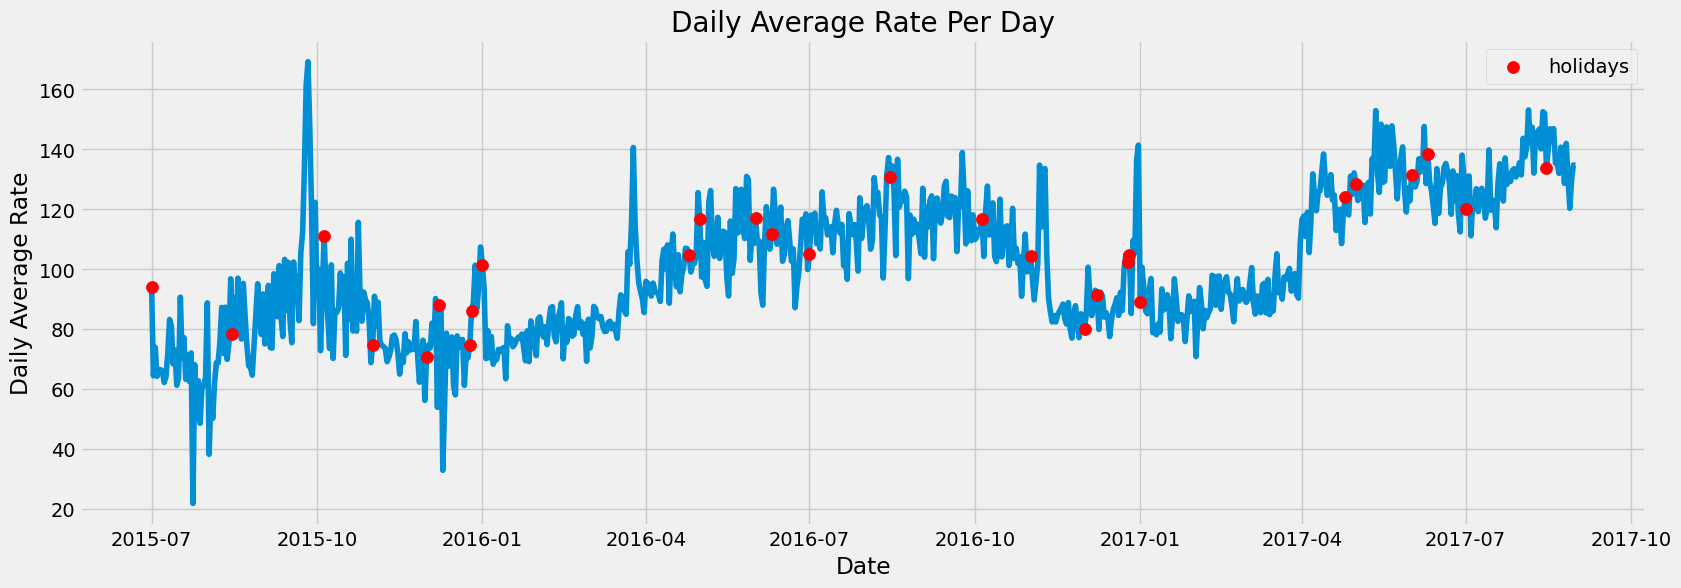

In [ ]:
# Here is the line graph containing the daily average over time and the red dots symbolizing various holidays in Portugal.
plt.figure(figsize=(18, 6))
plt.plot(avg_rate_per_day["arriv_date"], avg_rate_per_day["daily_avg_rate"], zorder= 1)
plt.scatter(national_holidays["arriv_date"], national_holidays["daily_avg_rate"], color= 'red', s= 75, zorder=2, label='holidays')
plt.title('Daily Average Rate Per Day')
plt.xlabel('Date')
plt.ylabel('Daily Average Rate');
plt.legend();

From the graph above, we learned that there doesn't seem to be a pattern for certain holidays. The red dots which mark the holidays seem to be relatively stable along the x-axis, and they do not seem to fall on the peaks or troughs that indicate high and low daily average rates. For example, Republic Day(October 5) is at 116 which sits in the middle of the revenue pattern that is going on in 2016. In terms of average daily rate, there seems to be a bit of a gradual increase over the years. There are a few outliers going up and down over time but there is not a clear indication as to why.

By observing this graph, we have a better understanding of how the hotel's  daily average rate has changed over time. We can use this information to better inform marketing decisions. Aside from a decrease in the first quarter of 2017, it appears that they have been able to steadily increase their average rate. Based on this, the hotel should be able to follow in this same pattern and continue to gradually increase their price, just as long as customers are willing to pay it.



The above picture gave us a good understanding of the hotel's revenue by looking at its average daily rate. However, another big part of earning revenue is attracting customers. This caused us to turn to trying to understand the hotel's target demographic and their habits, leading us to our next question which looks at the most popular countries of origin of the hotel guests.

###  What are the top ten guest origin countries?

In [ ]:
# Here we are selecting the top 10 countries of origin. This refers to where the guest(s) is from.
sql_statement = """SELECT country, COUNT(country) AS num_visitors
                   FROM hotel_res
                   GROUP BY country
                   ORDER BY COUNT(country) DESC
                   LIMIT 10;


                   """

visitors = pd.read_sql_query(sql_statement, conn)
visitors

,country,num_visitors
0,PRT,30960
1,FRA,8804
2,DEU,6084
3,GBR,5315
4,ESP,4611
5,ITA,3307
6,BEL,1894
7,BRA,1794
8,USA,1618
9,NLD,1590


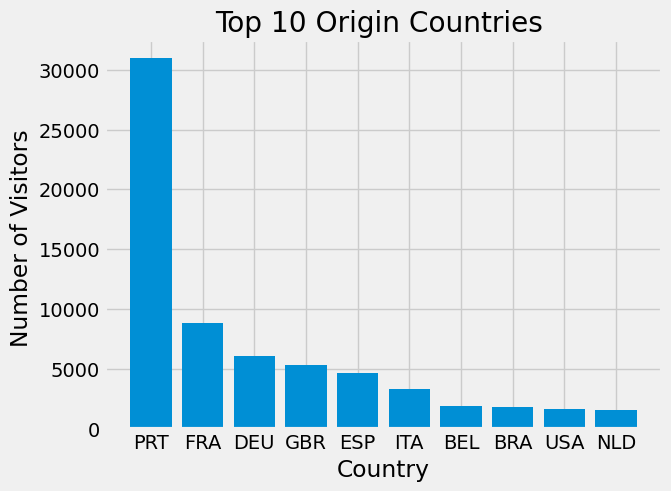

In [ ]:
# Here we create the bar graph for the top 10 countries for visitor origin
plt.bar(visitors['country'], visitors['num_visitors'])
plt.ylabel('Number of Visitors ')
plt.xlabel('Country')
plt.title('Top 10 Origin Countries ');

In the bar graph above, the countries are labeled with their ISO abbreviation, which stands for International Organization of Standardization. This abbreviation makes it so that all countries have a standard naming procedure outside of being bound by what they are called in different languages. Below is a guide for the full name of each country represented.

PRT- Portugal

FRA- France

DEU- Germany

GBR- United Kingdom

ESP- Spain

ITA- Italy

BEL- Belgium

BRA- Brazil

USA- United States

NLD- Netherlands


By looking at this graph, we learn that the hotel greatly serves more local individuals who are in Portugal. Second to Portugal is France, but it is still only about a third of the population as compared to high number boasted by Portugal. France, Germany, Spain, and Italy are similar in their number of guests, as are Belgium, Brazil, the United States, and the Netherlands. Eight of the countries are in Europe, and the other two are in the America's: the United States and Brazil. It is not surprising to see Brazil given that the native languge of Brazil is Portuguese.

Understanding the most frequent origin countries allows us to understand the hotel's target demographic. From a marketing perspective, that gives insight as to where to direct marketing efforts, such as paying for advertising. Additionally, having an increased understanding of the variety of cultures present at the hotel can allow hotel staff to ensure the most welcoming environment and increase guest satisfaction.



The above graph gave us insight into the hotel's demographic breakdown of their guests, including that a vast majority of them are Portugal natives. This made us wonder if some of these high rates could come from locals, or perhaps people who visit the hotel frequently. This lead us into looking at the distribution of repeat versus non-repeat guests. Furthermore, we wanted to gain and understanding of their lead time, or the amount of time between the booking of the reservation and the day the guest(s) arrived for their stay.

To understand this, we first isolated and observed the distribution of lead time by itself. Then we observed how lead time compares across repeat versus non-repeat guests.

###   What is the distribution of the lead time? How does it  compare across repeat vs non-repeat guests?

First, we look at the distribution of just the lead time variable

In [ ]:
# Here in this cell we are selecting the lead time from each booking in the data set.
sql_statement = """
                SELECT num_lead_time
                FROM hotel_res
                """

leadtime=pd.read_sql_query(sql_statement, conn)
leadtime

,num_lead_time
0,6
1,88
2,65
3,92
4,100
...,...
79325,23
79326,102
79327,34
79328,109


In [ ]:
#Here in this cell we are going to set up multipliers, so percents show on the y-axis of the graph.
num_rows=len(leadtime)
multipliers3=np.ones(num_rows)/num_rows*100
multipliers3;

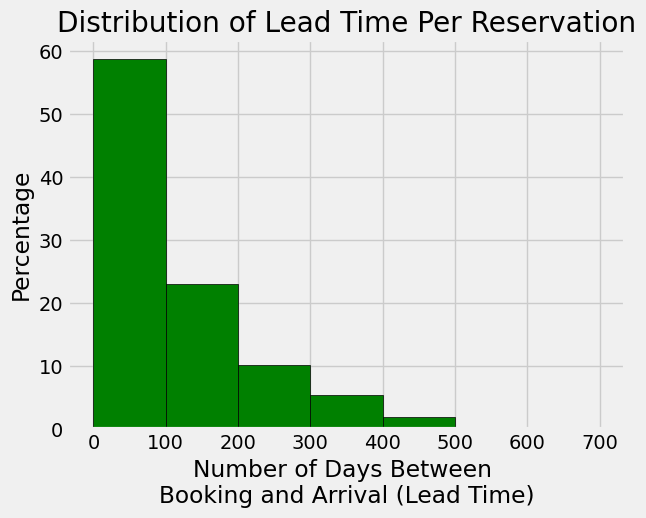

In [ ]:
#In this cell we are going to create a histogram, to show the distribution of lead time.
output=plt.hist(leadtime['num_lead_time'], edgecolor='black', bins=np.arange(0,800,100), weights=multipliers3, color='green')
plt.xlabel('Number of Days Between \nBooking and Arrival (Lead Time)')
plt.ylabel('Percentage')
plt.title('Distribution of Lead Time Per Reservation');

In [ ]:
# Here we are running the describe function, to allow us to see the statistics of the histogram up above.
stats_hotel=leadtime.describe()
stats_hotel

,num_lead_time
count,79330.000000
mean,109.735724
std,110.948526
min,0.000000
25%,23.000000
50%,74.000000
75%,163.000000
max,629.000000


In [ ]:
#Here we are re-running the variable 'output', which we stored our histogram in, so we can see the exact percentage for each bin.
output

(array([58.81381571, 23.0341611 , 10.23320308,  5.43804362,  1.90722299,
         0.39077272,  0.18278079]),
 array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <BarContainer object of 7 artists>)

This histogram displays the lead time, or the days elapsed from the booking confirmation compared to the customer's arrival, on the x-axis. And the y-axis displays the percentage of lead time that fell in the set range. Upon just eyeing the graph, it appears that about 57% of customer's had a lead time falling between 0-100. However, to completely sure, our group also ran the describe function allowing us to see the actual percentage of leadtime that falls between 0-100. We also stored our histogram into a variable named, 'Output', which allowed us to see the actual percentage for each bin, displayed on the histogram. The total percent of leadtime falling between 0-100 days is 58.8%. This illustrates that more than half of the customers in the dataset booked their hotel reservation at least 3 months prior to their vacation, business trip, etc. Furthermore, we also discovered that only about 7% of customers, booked their reservation at this partiuclar hotel, at least a year ahead of their visit.

After looking at lead time by itself, we wanted to observe how is is distributed across repeat versus non-repeat guests. This allows us to look at the habits of guests and see if there is a relationship between how many days in advance repeat guests book versus how many days in advance non repeat guests book.

Below, we observe this relationship.

In [ ]:
# Here we are obtaining the information for non-repeat guests, they are represented by a 0 in the repeat_guest column.
# the WHERE clause is also removing any cancelled bookings, as they are represented by a 1 in the is_cancel column as compared to a 0 if the booking is not canceled.
sql_statement = """
                SELECT num_lead_time, repeat_guest
                FROM hotel_res
                WHERE repeat_guest = 0
                  AND is_cancel = 0








                   """

nonrepeat_guests = pd.read_sql_query(sql_statement, conn)
nonrepeat_guests

,num_lead_time,repeat_guest
0,6,0
1,3,0
2,43,0
3,43,0
4,43,0
...,...,...
44632,23,0
44633,102,0
44634,34,0
44635,109,0


In [ ]:
# Now we obtain the information for repeat guests, they are represented by a 1 in the repeat_guest column.
# Canceled reservations were also removed, just as above.
sql_statement = """
                SELECT num_lead_time, repeat_guest
                FROM hotel_res
                WHERE repeat_guest = 1
                    AND is_cancel = 0








                   """

repeat_guests = pd.read_sql_query(sql_statement, conn)
repeat_guests

,num_lead_time,repeat_guest
0,0,1
1,1,1
2,0,1
3,1,1
4,0,1
...,...,...
1586,0,1
1587,7,1
1588,0,1
1589,0,1


In [ ]:
# Because of the start difference in the number of reservations made by repeat versus non-repeat guests, it was easiest to represent their distribution as a percentage.
# This cell is applying the formula to transform the data into perctanges for the non-repear guests.
num_rows = len(nonrepeat_guests)
multipliers = np.ones(num_rows)*100 / num_rows

multipliers

array([0.00224029, 0.00224029, 0.00224029, ..., 0.00224029, 0.00224029,
       0.00224029])

In [ ]:
# This cell is doing the same as above, just for repeat guests.
num_rows_2 = len(repeat_guests)
multipliers2 = np.ones(num_rows_2)*100 / num_rows_2

multipliers2

array([0.06285355, 0.06285355, 0.06285355, ..., 0.06285355, 0.06285355,
       0.06285355])

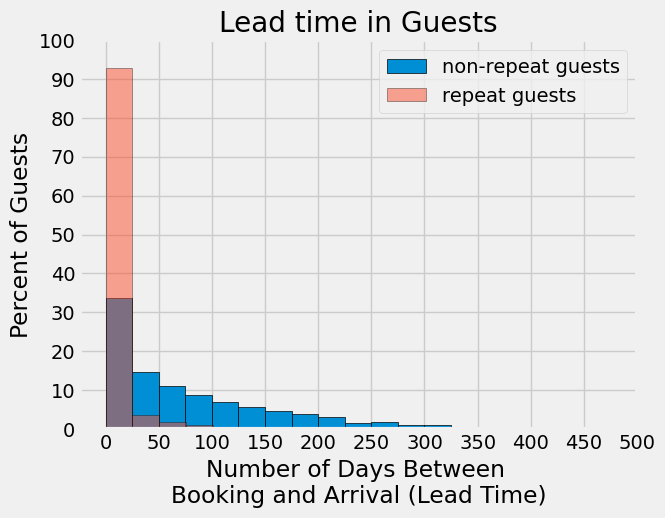

In [ ]:
# This cell plots the graph
plt.hist(nonrepeat_guests['num_lead_time'], edgecolor = 'black', weights = multipliers, bins = np.arange(0, 500, 25), label='non-repeat guests')
plt.hist(repeat_guests['num_lead_time'], edgecolor = 'black', weights = multipliers2, alpha = .5, label = 'repeat guests')
plt.yticks(np.arange(0,101, 10))
plt.xticks(np.arange(0,550,50))
plt.xlabel('Number of Days Between \nBooking and Arrival (Lead Time)')
plt.ylabel('Percent of Guests')
plt.title('Lead time in Guests')
plt.legend();

Based on the histogram, we are able to conclude that a difference does exist in how many days in advance repeat guests versus non-repeat guests book their stay. Over 90% of repeat-guest book their stay between 0 and 25 days before arrival, whereas that number is only about 35% for non-repeat guests. Both of these distributions skew right, however repeat guests are much more centralized in the first 4 bins between 0 and 100 days. Non-repeat guests vary much more in their booking habits as to how early in advance they do it.

Understanding this distribution is very imporant in understanding when and how to market to each group. For the repeat guests, perhaps they do not need as much notice or information prior to their booking. Instead, the marketing budget could be utilized more towards non-repeat guests and giving them deals and information further in advance which could align better with their booking habits.

After looking at understanding the distribution of lead time by itself and for the two subgroups, we wanted to observe lead time as a dependent variable. We decided to look at lead time as it relates to the number of days that the booking sat in the hotel's system before it was confirmed by the hotel. This will allow us to see if how the length of the lead time impacts how quickly the reservation is confirmed.

###  What is the relationship between number of days waiting and lead time?

In [ ]:
# Here in this cell we are selecting both columns, num_day_waiting and num_lead_time. It is also important to note, all 0's have been removed from this
# entry, as the amount of 0's that was previously in the set skewed the data.
sql_statement = """
                SELECT num_day_waiting, num_lead_time
                FROM hotel_res
                GROUP BY num_day_waiting, num_lead_time
                HAVING num_day_waiting>0 AND num_lead_time>0;
                """

num_days_waiting = pd.read_sql_query(sql_statement, conn)
num_days_waiting

,num_day_waiting,num_lead_time
0,1,1
1,1,5
2,1,6
3,1,30
4,1,61
...,...,...
302,330,429
303,379,422
304,391,443
305,391,457


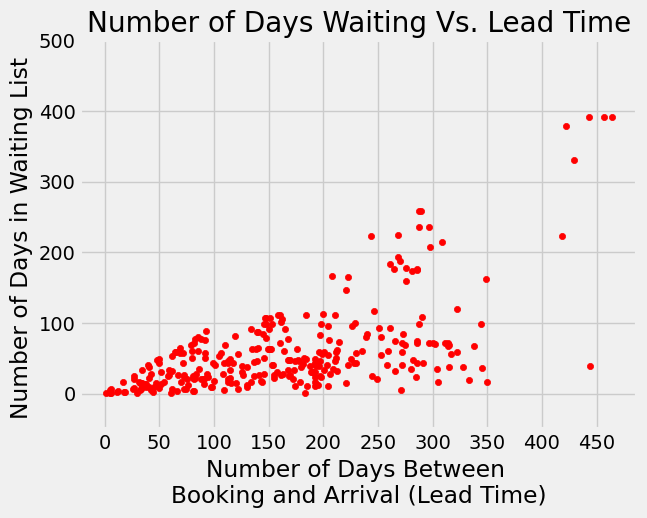

In [ ]:
#Here we create a scatter plot to display the correlation between number of days waiting and lead time.
plt.scatter(num_days_waiting['num_lead_time'],num_days_waiting['num_day_waiting'], color='red', s=20)
plt.title('Number of Days Waiting Vs. Lead Time')
plt.xlabel('Number of Days Between \nBooking and Arrival (Lead Time)')
plt.ylabel('Number of Days in Waiting List ')
plt.ylim(-50,500)
plt.xticks(np.arange(0,500,50));



By looking at the scatter plot above, we can determine that there is a positive relationship between the lead time and the number of days in the waiting list. A majority of the bookings appear to be clustered at around a lead time of 200 days and a waiting time of around 100 days or less. From here, the points seem to disperse more and have more variation in their lead time and the number of days they sat in the waiting list. We can also pinpoint some severe outliers, such as a lead time of roughly 450 days and a few bookings that took roughly 400 days to be confirmed. In order to better define the relationship between lead time and number of days waiting, we decided to find the correlation coefficient- a measure of the statistical strength between two variables.

In [ ]:
# Here we are computing the correlation coefficent
corr_ef=num_days_waiting.corr()
corr_ef


,num_day_waiting,num_lead_time
num_day_waiting,1.000000,0.613244
num_lead_time,0.613244,1.000000


In [ ]:
#In this cell we are selecting which two columns we want to find the correlation coeeficent for.
r=corr_ef['num_day_waiting']['num_lead_time']
r

0.6132438691266487

We determined that the correlation coefficent between days waiting and lead time was .61. This confirms that there is a positive, moderately stronger linear relationship between lead time and number of days waiting for confirmation. In other words, as lead time increases, so does the number of days waiting for confirmation.

Under these specific cirucumstances, the correlation coefficient should actually operate a little differerently than standard. In the long run, the hotel should seek to lessen the linear relationship between lead time and number of days waiting, meaning that the lead time just should not really have an affect on the number of days waiting. The hotel can use the current correlation coefficient as a marker for progress, but they should strive to keep a low number of days waiting across the board. Overall, this would satisfy those repeat guests and their small lead time as well as the non-repeat guests that likely need more information, and more assurance that their reservation is confirmed and their travel is on motion, even if they are planning months or a year in advance.

In keeping with observing customer habits and looking at increasing customer satisfaction, we wanted to observe one final variable - special requests. For many, hotels are a place you come for rest and relaxation, especially for a nice summer holiday or maybe just escaping the winter cold. No matter the reason, it is important that special requests be met, or at least considered. By doing so, the entire experience for the guest is elevated, and will likely keep them comong back for more.

In looking at the number of special requests made by guests, we looked at them as a result of different temperatures to determine if more are made when it is colder, or if more are made when it is warmer. This was accomplished by joining onto another table that had weather data for Lisbon, Portugal for our specific dates.


### What is the relationship between average temperature and and number of special requests?

In [ ]:
# Here, we joined the hotel_res table to the temps table. We joined them on the year.
# We then found the total number of special requests made per month.
# We then found monhtly temperature averages for each year inside the table.
# We filtered the results to only show when the reservation was not canceled, indicated by a 0
# We filtred the results to only include reservations where the number of special requests was greater than 0
sql_statement = """
               SELECT SUM(h.num_spec_reqs) AS num_reqs, h.arriv_yr, h.arriv_month, h.arriv_day,
                      AVG(t.temp) as avg_month_temp, t.year, t.month, t.day
              FROM hotel_res AS h
                      JOIN
                  temps as t
                      ON h.arriv_yr = t.year
                          AND h.arriv_month = t.month
                          AND h.arriv_day = t.day
              WHERE h.is_cancel = 0
                  AND num_spec_reqs > 0
              GROUP BY arriv_month








                   """

reqs_vs_temp = pd.read_sql_query(sql_statement, conn)  #Call the results game_stop
reqs_vs_temp

,num_reqs,arriv_yr,arriv_month,arriv_day,avg_month_temp,year,month,day
0,3139,2016,April,1,61.303880,2016,April,1
1,4567,2015,August,1,74.403985,2015,August,1
2,1749,2015,December,3,55.072675,2015,December,3
3,2038,2016,February,1,54.947222,2016,February,1
4,1473,2016,January,1,53.280548,2016,January,1
5,3848,2015,July,9,73.789644,2015,July,9
6,3430,2016,June,2,71.195236,2016,June,2
7,2751,2016,March,1,56.259784,2016,March,1
8,3459,2016,May,1,65.020969,2016,May,1
9,1925,2015,November,1,59.109716,2015,November,1


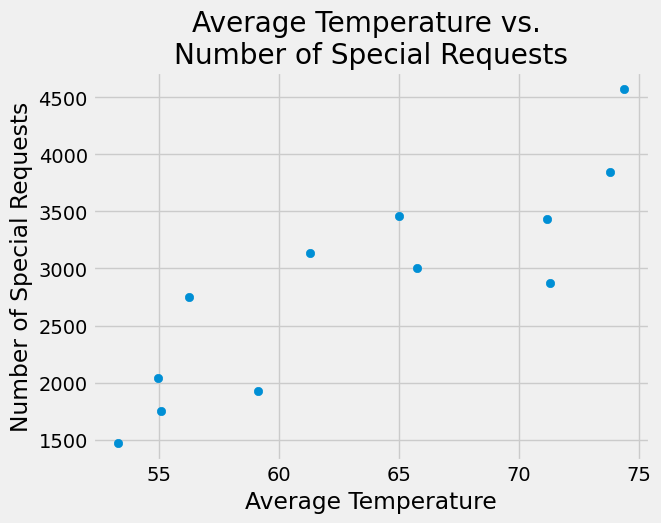

In [ ]:
# The code for the Scatter Plot
plt.scatter(reqs_vs_temp['avg_month_temp'], reqs_vs_temp['num_reqs'])
plt.title("Average Temperature vs. \nNumber of Special Requests")
plt.xlabel('Average Temperature')
plt.ylabel('Number of Special Requests');

In [ ]:
# Finding the correlation coefficient
corr_df = reqs_vs_temp.corr()
corr_df

<ipython-input-218-2c686e7422e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = reqs_vs_temp.corr()


,num_reqs,arriv_yr,arriv_day,avg_month_temp,year,day
num_reqs,1.000000,-0.158153,0.268155,0.869798,-0.158153,0.268155
arriv_yr,-0.158153,1.000000,-0.338480,-0.415195,1.000000,-0.338480
arriv_day,0.268155,-0.338480,1.000000,0.368759,-0.338480,1.000000
avg_month_temp,0.869798,-0.415195,0.368759,1.000000,-0.415195,0.368759
year,-0.158153,1.000000,-0.338480,-0.415195,1.000000,-0.338480
day,0.268155,-0.338480,1.000000,0.368759,-0.338480,1.000000


In [ ]:
# Finding the correlation coefficient
r = corr_df['avg_month_temp']['num_reqs']
r

0.869797728679879

Looking at the scatter plot and the correlation coefficient of .869, we can determine that there is a strong positive linear relationship between the average temperature and the number of special requests. As the temperature increases, so does the number of special requests. This could be due to asking for things such as putting up umbrellas, or other beach and pool related asks that are more frequent in the summer. It could also be because the number of guests could be higher in the warmer months due to increased vactioners, and thus the number of special requests would also likely increase.

---

## Conclusion


In this project, we examined multiple variables pertaining to a hotel located in Lison, Portugal. We approached the data from a marketing perspective, and used visualizations to better understand the relationships between the many variables found within our database. We used the visualizations to inform our conversation about the hotel's management decisions and provide insight as to how they are choosing to market and offer suggestions for the future.

We began by analyzing the hotel's profit by examining the change in the average daily rate as it relates to Portuguese holidays. We found that the holidays do not exactly line up with the highs and lows for the average daily rate, but that the average daily rate has generally increased over time. After examining price, we wanted to examine the individuals behind the revenue, the customers. We started by looking at a breakdown of where the hotel's guests come from geographically, and learned that a large majority are Portugal locals. From there, we wanted to understand more about the habits of the customers, and so we examined how lead time is distributed across the repeat guest versus non-repeat guest subgroups. First, we gained an understanding about lead time by itself, and we learned that a majority of reservations have a lead time of 100 days or less. Then, we learned that this distribution is quite different for repeat verus non-repeat guests, as 90% of repeat guests have a lead time of less than 25 days. In keeping with our theme of repeat guests, we wanted to dive into some variables that play a likely role in customer satisfaction. We started by looking at the relationship between lead time and number of days waiting for the hotel to confirm a booking after it was made. We learned that this was a moderately strong relationship, and as lead time went up, so did time waiting. We did conclude, however, that maybe this is something that should actually be looked into as the lead time should not play as big of a role in how long it takes a booking to be confirmed. Instead, the process should be more streamlined regardless of lead time. Finally, we looked at a big marker for customer satisfaction, the number of special requests made. We looked at this variable as it relates to how warm or cold it is by joining onto another dataset. We found another strong, positive linear relationship indicating that as the temperature increases, so do the number of special requests.

When looking at our dataset, it had a large variety of variables that provided us with a great foundation for analysis. Some data that could further expand our understanding would be to look at information regarding hotels in the surrounding area to see how they compete in these aspects. Understanding your competition is one of the key components of marketing and cannot be overlooked. Futhermore, if we had more time, we would have built upon our lead time distribution question to look at both lead time and non-repeat guests versus repeat-guests independently. We also would have built upon our last question to determine if the number of special requests increase during the summer months because the numebr of guests increases due to it being a popular vacationing time. We also would have liked to jump more into some of the data pertaining to customer habits, such as their room or meal plan preference. Overall, this dataset provided for interesting visualizations and conversation on the hotel industry and the importance of using data to understand and direct marketing efforts.



---